In [1]:
# Transformer-based Time Series GAN-based Augmentation Models
# https://github.com/nachi-hebbar/Time-Series-Forecasting-LSTM/blob/main/RNN_Youtube.ipynb
# https://www.youtube.com/watch?v=S8tpSG6Q2H0&t=345s&ab_channel=NachiketaHebbar
# https://www.youtube.com/watch?v=c0k-YLQGKjY&ab_channel=GregHogg

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_excel(r'Fixed_stations.xlsx', sheet_name='Fixed Station')
df = pd.read_excel(r'Fixed_station.xlsx')

In [4]:
df['Datetime'] = pd.to_datetime(df['timestamp'], unit='s')

In [5]:
df.rename({'pm2.5(ug/m3)': 'pm2.5', 'pm10(ug/m3)': 'pm10'}, axis=1, inplace=True)
df

,timestamp,sensor ID,pm2.5,pm10,latitude,longitude,Datetime
0,1648771251,869170034045121,5.40,7.18,53.336920,-6.293910,2022-04-01 00:00:51
1,1648771253,869170033931073,4.50,6.57,53.336917,-6.293908,2022-04-01 00:00:53
2,1648771256,869170034081928,7.05,9.35,53.336925,-6.293848,2022-04-01 00:00:56
3,1648771261,869170033930547,4.95,5.40,53.336923,-6.293840,2022-04-01 00:01:01
4,1648771271,869170034081928,6.90,8.09,53.336918,-6.293830,2022-04-01 00:01:11
...,...,...,...,...,...,...,...
999994,1652303208,869170033930471,0.77,1.85,53.333803,-6.350490,2022-05-11 21:06:48
999995,1652303210,869170034050550,1.27,1.52,53.312078,-6.293955,2022-05-11 21:06:50
999996,1652303213,869170033935751,3.28,4.62,53.372680,-6.285203,2022-05-11 21:06:53
999997,1652303216,869170033930620,1.15,1.93,53.378278,-6.181972,2022-05-11 21:06:56


<AxesSubplot: >

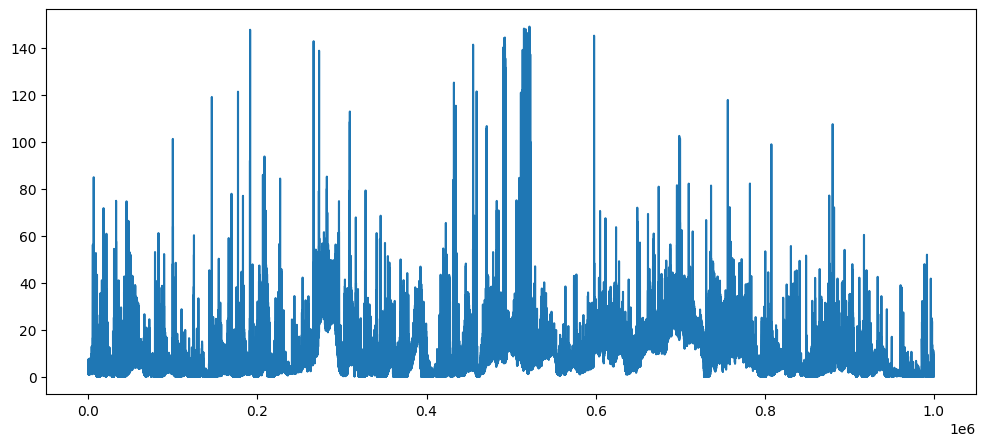

In [6]:
df['pm2.5'].plot(figsize=(12,5))

In [7]:
'''# Checking for stationary
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['pm10'])'''

'# Checking for stationary\nfrom statsmodels.tsa.stattools import adfuller\ndef adf_test(dataset):\n     dftest = adfuller(dataset, autolag = \'AIC\')\n     print("1. ADF : ",dftest[0])\n     print("2. P-Value : ", dftest[1])\n     print("3. Num Of Lags : ", dftest[2])\n     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])\n     print("5. Critical Values :")\n     for key, val in dftest[4].items():\n         print("\t",key, ": ", val)\nadf_test(df[\'pm10\'])'

In [8]:
# Resetting the index
df.set_index('Datetime', inplace=True)

In [9]:
df

,timestamp,sensor ID,pm2.5,pm10,latitude,longitude
Datetime,,,,,,
2022-04-01 00:00:51,1648771251,869170034045121,5.40,7.18,53.336920,-6.293910
2022-04-01 00:00:53,1648771253,869170033931073,4.50,6.57,53.336917,-6.293908
2022-04-01 00:00:56,1648771256,869170034081928,7.05,9.35,53.336925,-6.293848
2022-04-01 00:01:01,1648771261,869170033930547,4.95,5.40,53.336923,-6.293840
2022-04-01 00:01:11,1648771271,869170034081928,6.90,8.09,53.336918,-6.293830
...,...,...,...,...,...,...
2022-05-11 21:06:48,1652303208,869170033930471,0.77,1.85,53.333803,-6.350490
2022-05-11 21:06:50,1652303210,869170034050550,1.27,1.52,53.312078,-6.293955
2022-05-11 21:06:53,1652303213,869170033935751,3.28,4.62,53.372680,-6.285203


In [10]:
new_df = df[["pm10","latitude","longitude"]].copy()
new_df

,pm10,latitude,longitude
Datetime,,,
2022-04-01 00:00:51,7.18,53.336920,-6.293910
2022-04-01 00:00:53,6.57,53.336917,-6.293908
2022-04-01 00:00:56,9.35,53.336925,-6.293848
2022-04-01 00:01:01,5.40,53.336923,-6.293840
2022-04-01 00:01:11,8.09,53.336918,-6.293830
...,...,...,...
2022-05-11 21:06:48,1.85,53.333803,-6.350490
2022-05-11 21:06:50,1.52,53.312078,-6.293955
2022-05-11 21:06:53,4.62,53.372680,-6.285203


<AxesSubplot: xlabel='Datetime'>

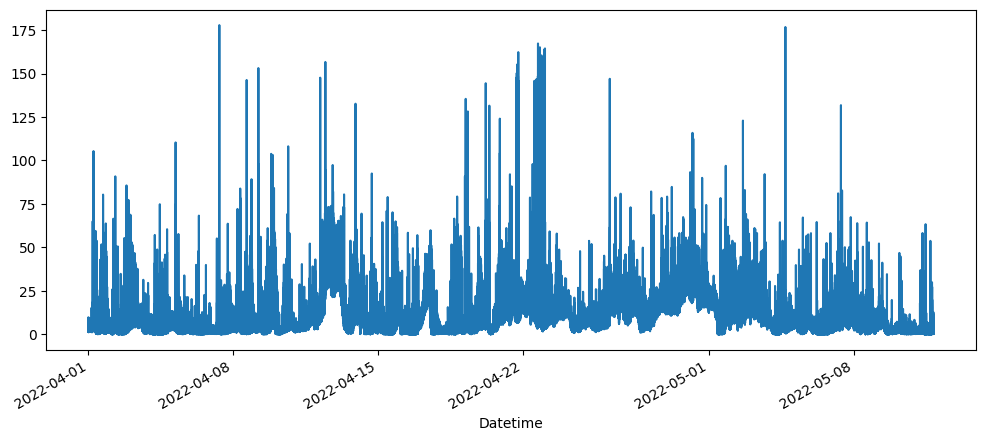

In [11]:
new_df['pm10'].plot(figsize=(12,5))

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

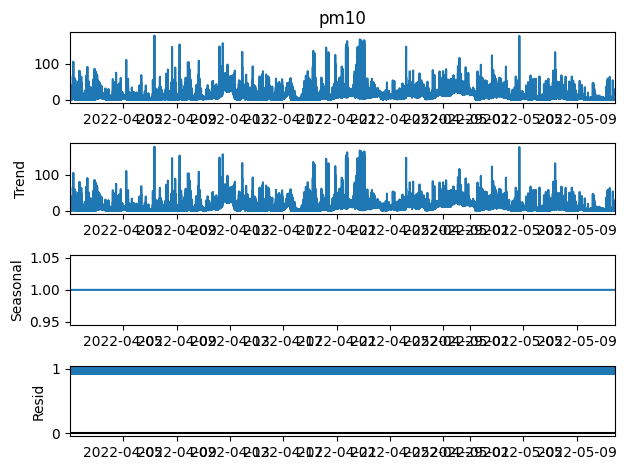

In [13]:
decompose_result = seasonal_decompose(new_df.pm10, model='multiplicative', period=1)
decompose_result.plot();

In [14]:
train = new_df.iloc[:156]
test = new_df.iloc[156:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:

# define generator
n_input = 3
n_features = 3
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [19]:
#X,y = generator[0]
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
     

Given the Array: 
[0.69129917 0.2        0.         0.61859356 0.176      0.01503759
 0.94994041 0.24       0.46616541]
Predict this y: 
 [[0.47914184 0.224      0.52631579]]


In [20]:
X.shape

(1, 3, 3)

In [21]:

# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
from keras.layers import Dense
from keras.layers import LSTM

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [24]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(3))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41600     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 41,915
Trainable params: 41,915
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit model
model.fit(generator,epochs=10)

Epoch 1/10
144/144 [==============================] - 3s 8ms/step - loss: 0.0654
Epoch 2/10
144/144 [==============================] - 1s 10ms/step - loss: 0.0293
Epoch 3/10
144/144 [==============================] - 2s 13ms/step - loss: 0.0263
Epoch 4/10
144/144 [==============================] - 1s 9ms/step - loss: 0.0249
Epoch 5/10
144/144 [==============================] - 1s 7ms/step - loss: 0.0243
Epoch 6/10
144/144 [==============================] - 1s 9ms/step - loss: 0.0229
Epoch 7/10
144/144 [==============================] - 1s 7ms/step - loss: 0.0220
Epoch 8/10
144/144 [==============================] - 1s 7ms/step - loss: 0.0216
Epoch 9/10
144/144 [==============================] - 1s 6ms/step - loss: 0.0216
Epoch 10/10
144/144 [==============================] - 1s 6ms/step - loss: 0.0204


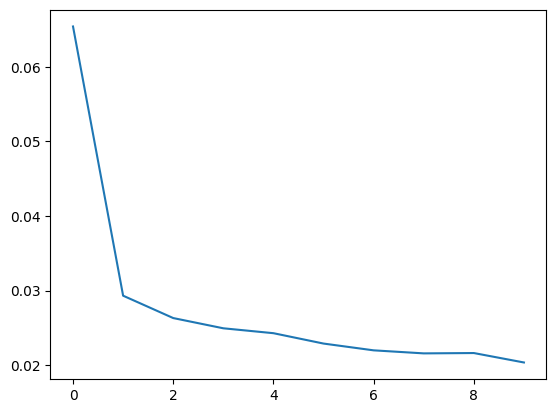

In [27]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [28]:
last_train_batch = scaled_train[-12:]

In [29]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [30]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 332ms/step


array([[0.48599368, 0.24688116, 0.6365024 ]], dtype=float32)

In [31]:
scaled_test[0]

array([0.83313468, 0.2       , 0.54135338])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 32ms/step


In [ ]:
test_predictions

In [33]:
a=[row[0] for row in test_predictions]
a

[0.48599368,
 0.4903815,
 0.49410224,
 0.486294,
 0.47920114,
 0.46903273,
 0.46692264,
 0.47203156,
 0.4693889,
 0.46531567,
 0.46353716,
 0.4607456,
 0.45954305,
 0.4594462,
 0.45932078,
 0.45893157,
 0.45825964,
 0.45769918,
 0.45715287,
 0.4566509,
 0.45625886,
 0.45588532,
 0.4555542,
 0.45524386,
 0.45495474,
 0.45467183,
 0.4543942,
 0.45412734,
 0.4538768,
 0.45363876,
 0.45340702,
 0.4531886,
 0.45298338,
 0.4527908,
 0.45261043,
 0.4524419,
 0.4522846,
 0.4521386,
 0.45200258,
 0.45187658,
 0.45176,
 0.45165196,
 0.4515522,
 0.45146018,
 0.45137563,
 0.45129782,
 0.45122635,
 0.451161,
 0.45110118,
 0.4510463,
 0.45099628,
 0.45095065,
 0.45090905,
 0.45087123,
 0.45083702,
 0.4508059,
 0.4507777,
 0.45075202,
 0.45072898,
 0.45070815,
 0.4506895,
 0.4506725,
 0.45065725,
 0.4506436,
 0.4506314,
 0.45062053,
 0.45061067,
 0.4506021,
 0.4505943,
 0.45058742,
 0.45058143,
 0.45057583,
 0.45057118,
 0.45056692,
 0.4505632,
 0.45055994,
 0.4505571,
 0.4505547,
 0.45055258,
 0.450

In [ ]:
test.head()

In [34]:
true_predictions = scaler.inverse_transform(test_predictions)

In [35]:
test['pm10'] = true_predictions

ValueError: Length of values (31174) does not match length of index (999843)

<AxesSubplot: xlabel='Datetime'>

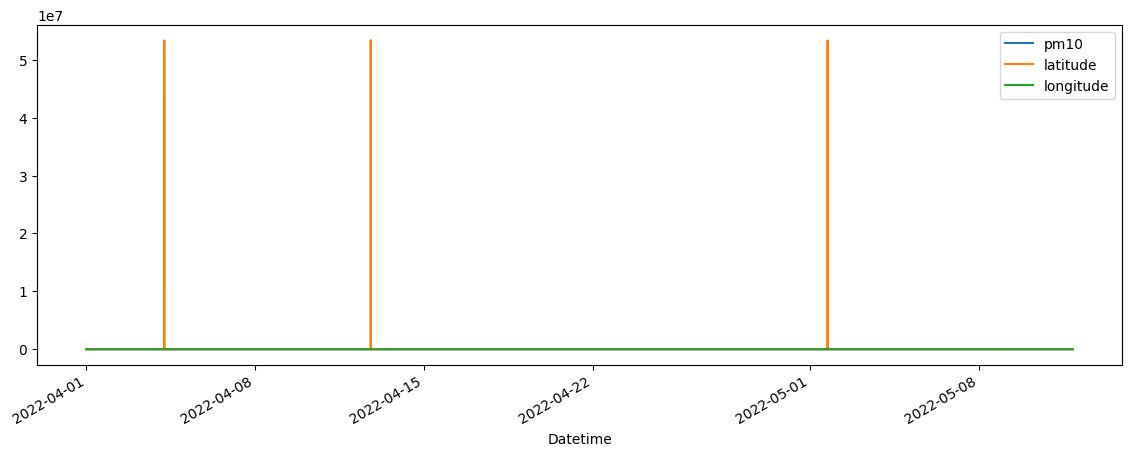

In [36]:
test.plot(figsize=(14,5))

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['pm10'],a))
print(rmse)

ValueError: Found input variables with inconsistent numbers of samples: [999843, 31174]